In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [38]:
df = pd.read_csv("hw#2_data.csv")
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,11/4/2019,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,11/2/2019,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,11/6/2019,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,C10004
4,11/1/2019,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


# Business Questions A) Does the financial type affect the waiting time? Explain with appropriate chart

เราจะทำการหา waiting time ของแต่ละคนก่อน โดยนำ complete time มาลบกับ entry time แล้วแปลงให้เป็นวินาที  
จานั้นเราจะจัดกลุ่มตามประเภทของ financial class แล้วนำมาหาค่าเฉลี่ยของกลุ่มนั้นๆอีกที

In [39]:
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h*3600 + m*60 + s

# Function to calculate duration in minutes for a row
def calculate_duration(row):
    start_minutes = time_to_minutes(row['Entry Time'])
    finish_minutes = time_to_minutes(row['Completion Time'])
    return finish_minutes - start_minutes

# Apply the function to calculate the duration in minutes for each row
df['WaitingTime_Second'] = df.apply(calculate_duration, axis=1)

<Axes: xlabel='Financial Class', ylabel='count'>

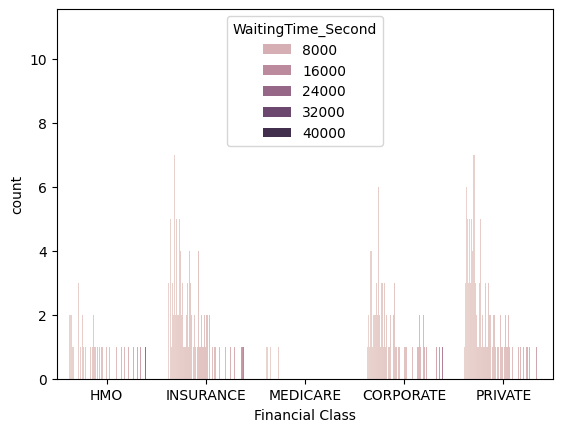

In [40]:
sns.countplot(data=df, x="Financial Class", hue="WaitingTime_Second")

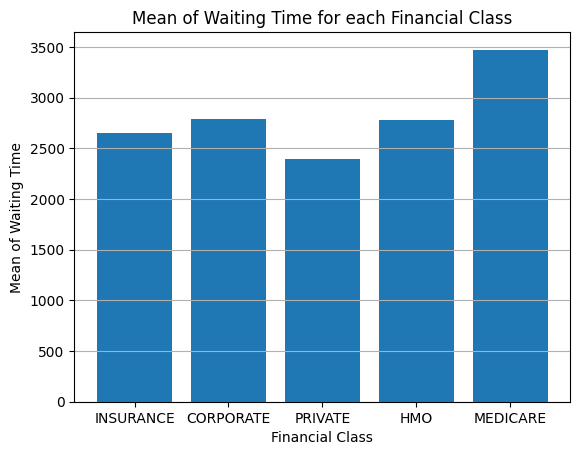

In [41]:
mean_fc = {}
financial_classes = ['INSURANCE', 'CORPORATE', 'PRIVATE', 'HMO', 'MEDICARE']
for fc in financial_classes:
    fc_df = df[df['Financial Class'] == fc]
    mean_fc_seconds = fc_df['WaitingTime_Second'].mean()
    mean_fc[fc] = mean_fc_seconds
plt.bar(mean_fc.keys(), mean_fc.values())
plt.title('Mean of Waiting Time for each Financial Class')
plt.xlabel('Financial Class')
plt.ylabel('Mean of Waiting Time')
plt.grid(axis='y')
plt.show()

จากกราฟจะเห็นได้ชัดเจนว่ามีความแตกต่างของค่าเฉลี่ยเวลาการรออยู่ โดยที่ค่าเฉลี่ยของกลุ่มคนที่เลือกจ่ายโดย Medicare มีค่ามากสุดอยู่ที่ประมาณเกือย 3500 วินาทีหรือ เกือบ 1 ชั่วโมง ลำดับต่อมาเป็น Corporate, HMO, Insurance และ Private financial class ตามลำดับ

# Business Questions B) What days of week are affected ? Explain with appropriate chart

วิธีการคือเราจะแปลงจากวันที่เป็นวัน จากนั้นจาก waiting time ที่เราได้ทำไว้แล้ว นำมาจัดกลุ่มตามวันแล้วหาค่าเฉลี่ยออกมา

In [42]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
Day = df['Date'].dt.day_name()
df['Day'] = Day
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,WaitingTime_Second,Day
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,C10001,3241,Monday
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,7491,Wednesday
2,2019-11-02,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,4776,Saturday
3,2019-11-06,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,C10004,4768,Wednesday
4,2019-11-01,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,3033,Friday


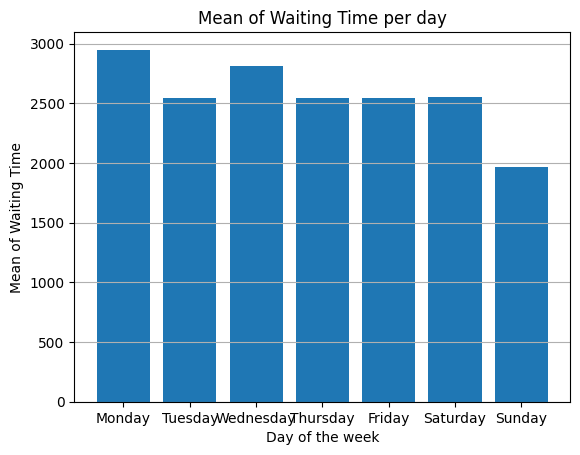

In [43]:
mean_day = {}
Dotw = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
for day in Dotw:
    day_df = df[df['Day'] == day]
    mean_day_seconds = day_df['WaitingTime_Second'].mean()
    mean_day[day] = mean_day_seconds
plt.bar(mean_day.keys(), mean_day.values())
plt.title('Mean of Waiting Time per day')
plt.xlabel('Day of the week')
plt.ylabel('Mean of Waiting Time')
plt.grid(axis='y')
plt.show()

จากกราฟเราสรุปได้ว่าช่วงเวลาที่ต้องรอของเกือบทุกวันเท่าๆกัน ยกเว้นวันจันทร์ที่ต้องรอนานกว่าวันอื่นๆ และวันอาทิตย์ที่เวลารอน้อยกว่าวันอื่นๆ

# Business Questions C) Are waiting times associated with the busy periods (morning hours)? Explain with appropriate chart

สำหรับ busy period นั้นกำหนดให้เป็น 6-11 โมงเช้า

In [44]:
df['Entry Time'] = pd.to_datetime(df['Entry Time'], format='%H:%M:%S', errors='coerce')
df['Is_Busy'] = df['Entry Time'].dt.hour.apply(lambda x: 1 if 6 <= x < 11 else 0)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,WaitingTime_Second,Day,Is_Busy
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,1900-01-01 08:35:45,9:17:54,9:29:46,C10001,3241,Monday,1
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,1900-01-01 19:19:16,21:02:36,21:24:07,C10002,7491,Wednesday,0
2,2019-11-02,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,1900-01-01 10:46:52,11:56:25,12:06:28,C10003,4776,Saturday,1
3,2019-11-06,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,1900-01-01 09:38:34,10:55:50,10:58:02,C10004,4768,Wednesday,1
4,2019-11-01,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,1900-01-01 11:16:21,12:06:49,12:06:54,C10005,3033,Friday,0


Mean of Waiting Time for Non-Busy Period in seconds: 2216.0327753779698
Mean of Waiting Time for Busy Period in seconds: 3296.5316257187665


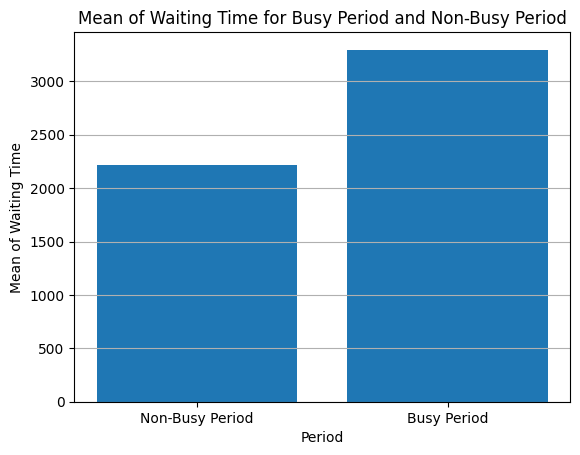

In [45]:
Busy_Column = [0,1]
mean_busy = {}

for i in Busy_Column:
    busy_df = df[df['Is_Busy'] == i]
    mean_busy_seconds = busy_df['WaitingTime_Second'].mean()
    if i==0 :
      mean_busy['Non-Busy Period'] = mean_busy_seconds
      print(f"Mean of Waiting Time for Non-Busy Period in seconds: {mean_busy_seconds}")
    if i==1 :
      mean_busy['Busy Period'] = mean_busy_seconds
      print(f"Mean of Waiting Time for Busy Period in seconds: {mean_busy_seconds}")
plt.bar(mean_busy.keys(), mean_busy.values())
plt.title('Mean of Waiting Time for Busy Period and Non-Busy Period')
plt.xlabel('Period')
plt.ylabel('Mean of Waiting Time')
plt.grid(axis='y')
plt.show()

จากกราฟที่ได้แสดงให้เห็นว่าค่าเฉลี่ยของเวลาที่ต้องรอในช่วง busy period นั้น มีค่าสูงกว่า non-busy period ถึงเกือย 1000 วินาทีหรือประมาณ 15 นาที นั้นคือในช่วงเวลา busy period มีผลทำให้ waiting time ที่นานขึ้นกว่า non-busy period นั่นเอง

# Business Questions D) What do you suggest as Action Plans to the management to improve customer satisfaction?

จากข้อ A สิ่งที่เราต้องปรับปรุงคือการให้ความสำคัญกับลูกค้ากลุ่ม Medicare มากขึ้นเพื่อให้คนไข้กลุ่มนี้รอน้อยลง  
จากข้อ B สิ่งที่เราต้องปรับปรุงคือทำให้ช่วงเวลารอในวันจันทร์น้อยลง โดดยอาจจะเพิ่มจำนวนหมดในวันจันทร์เป็นพิเศษ หรือลดจำนวนคิวนัดหมอวันจันทร์ แล้วไปเพิ่มวันอาทิตย์ที่มีเวลารอไม่นานแทน  
จากข้อ C สิ่งที่ต้องทำคือ ในช่วงเวลา busy period หรือช่วง 6 โมงถึง 11 โมง ต้องมีการเคลียร์คนไข้ให้เร็วกว่านี้เพื่อลดเวลาการรอ โดยอาจจะเพิ่มจำนวนหมอในรอบเช้าให้มากขึ้น หรือเพิ่มรอบนัดในตอนบ่ายให้มาดกขึ้น